In [2]:
# !pip install keras

In [3]:
# !pip install tensorflow

In [4]:
# !pip install pydot

In [5]:
# !pip install graphviz 

# 0. Import Packages

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.colors import LinearSegmentedColormap

from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from dmba import classificationSummary
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 1. Data Exploration

In [204]:
seed = 84
np.random.seed(seed)
train_df = pd.read_csv("USCensusTraining.csv")
test_df = pd.read_csv("USCensusTest.csv")

In [11]:
train_df.sample(5)

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1893,34,Private,192002,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K.
4044,19,Private,246652,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K.
3274,52,Local-gov,317733,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K.
22099,33,State-gov,243678,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K.
10602,31,Private,188246,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.


In [12]:
train_df.shape

(25000, 15)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [14]:
# check fields with ? values
null_dict = dict()
for col in train_df.columns:
    if '?' in train_df[col].value_counts().index:
        null_dict[col] = train_df[col].value_counts()['?']
null_dict

{'workclass': 1399, 'occupation': 1404, 'native-country': 445}

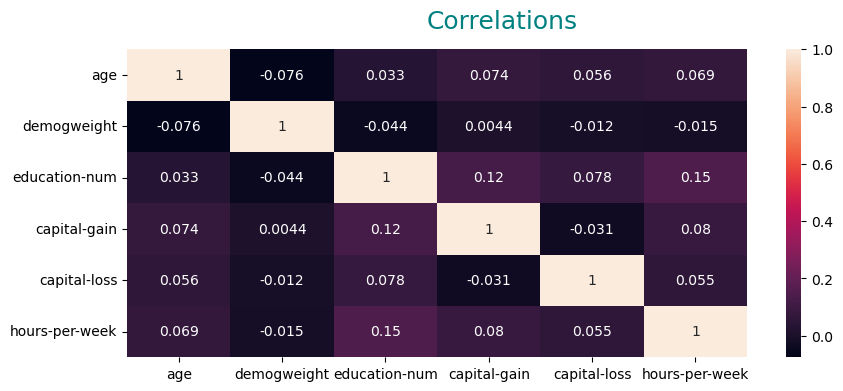

In [15]:
# Check correlations
plt.figure(figsize=(10, 4))
plt.suptitle('Correlations', fontsize = 18, color= 'teal')
corr = pd.DataFrame(train_df).corr()
sns.heatmap(corr, annot=True)
plt.show()

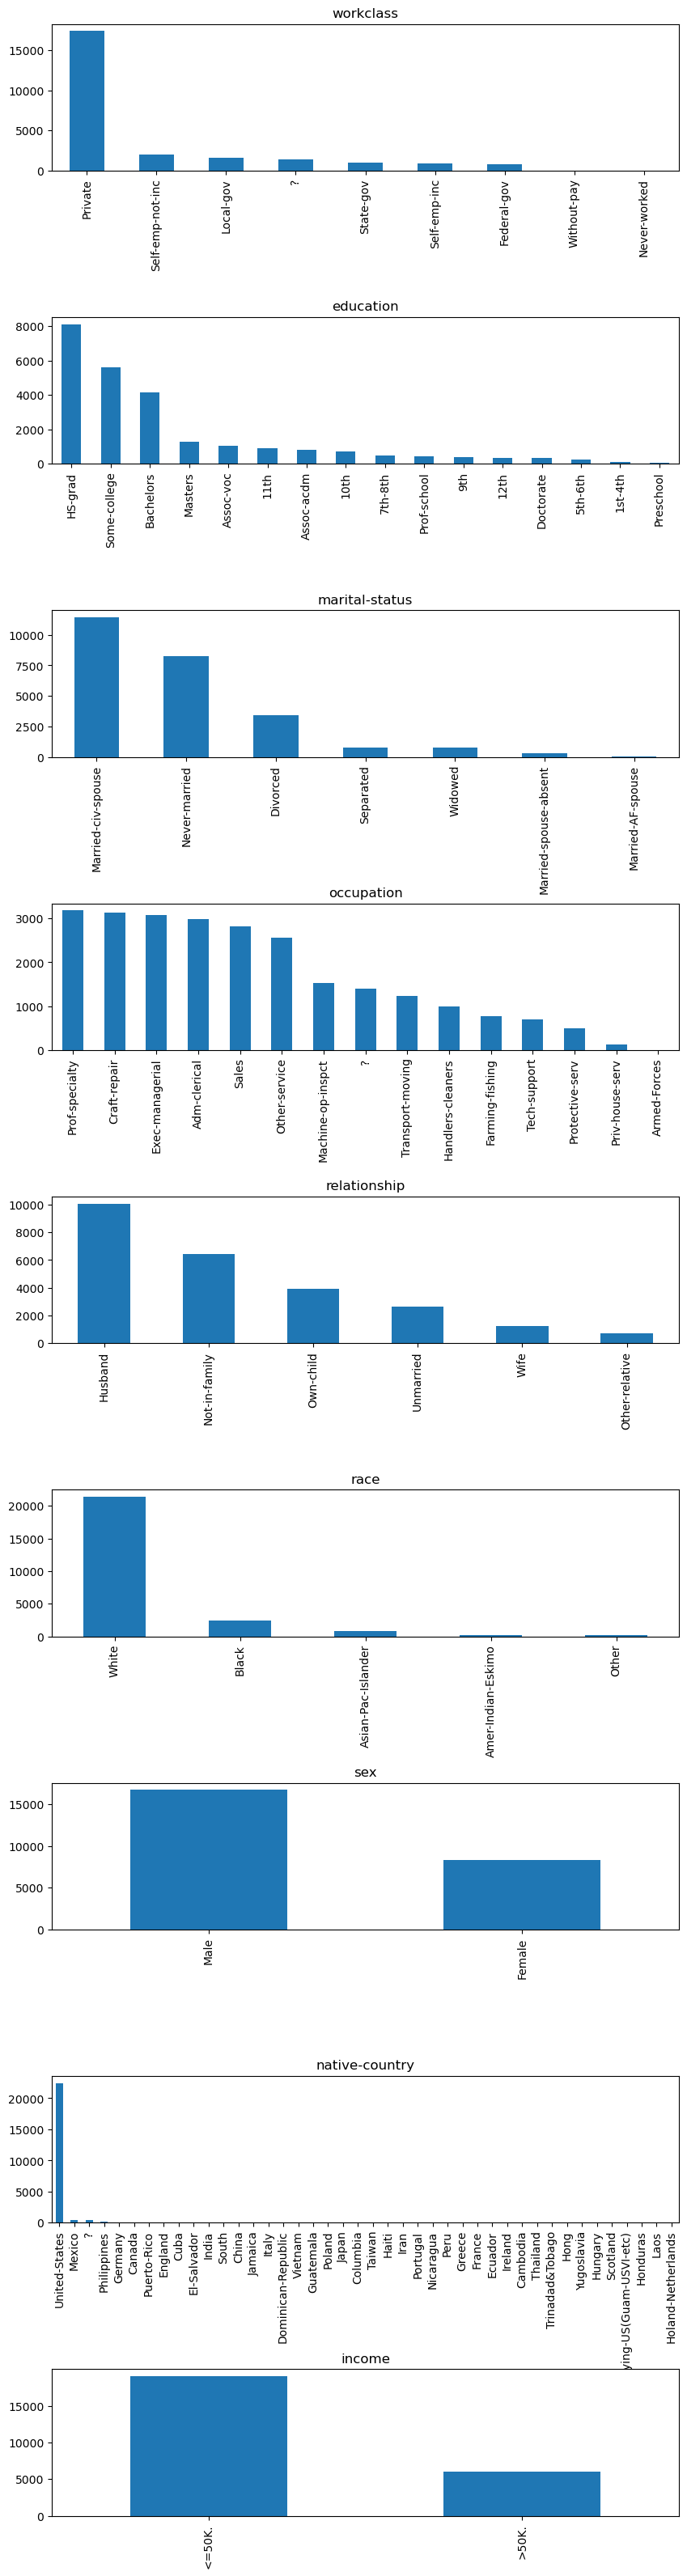

In [18]:
# plot value counts of each categorical column
obj_col_list = ['workclass', 'education', 'marital-status', 'occupation', 
          'relationship', 'race', 'sex', 'native-country', 'income']

fig, axs = plt.subplots(len(obj_col_list), figsize=(10, 40))
plt.subplots_adjust(hspace=1)
for col in obj_col_list:
     train_df[col].value_counts().plot(kind = "bar", ax=axs[obj_col_list.index(col)]).set_title(col)
fig.show()

In [19]:
train_df['native-country'].value_counts()

United-States                 22421
Mexico                          488
?                               445
Philippines                     151
Germany                         102
Canada                           99
Puerto-Rico                      96
England                          72
Cuba                             72
El-Salvador                      72
India                            67
South                            64
China                            60
Jamaica                          58
Italy                            55
Dominican-Republic               54
Vietnam                          50
Guatemala                        50
Poland                           49
Japan                            48
Columbia                         45
Taiwan                           42
Haiti                            38
Iran                             35
Portugal                         28
Nicaragua                        25
Peru                             23
Greece                      

In [20]:
# Prepare for Crosstab
train_crosstab_df = train_df.copy(deep=True)
train_crosstab_df['income'] = train_crosstab_df['income'] == '>50K.'
train_crosstab_df.head(5)

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


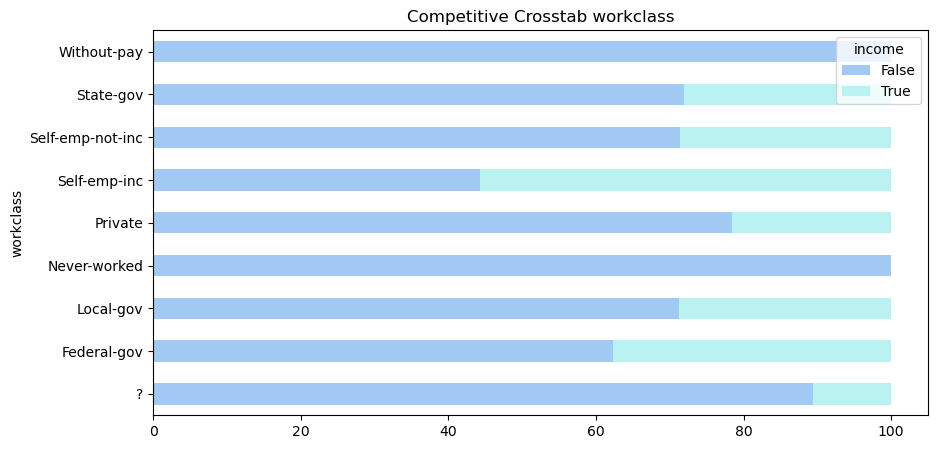

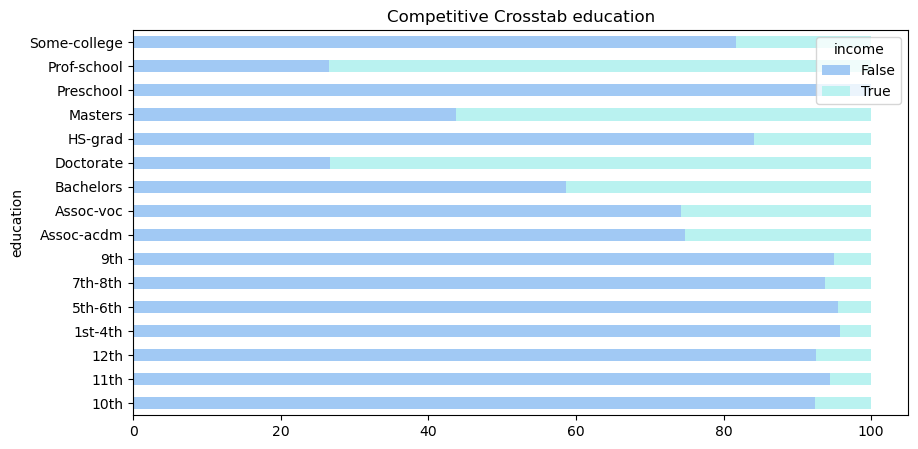

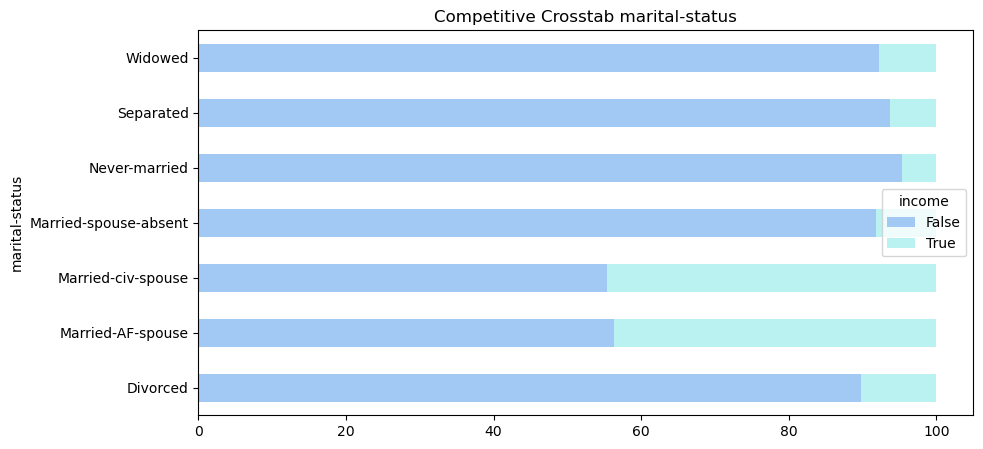

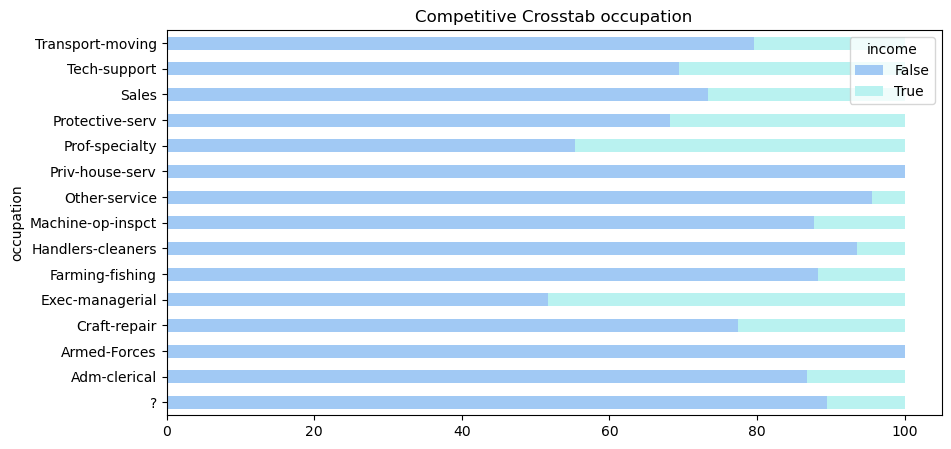

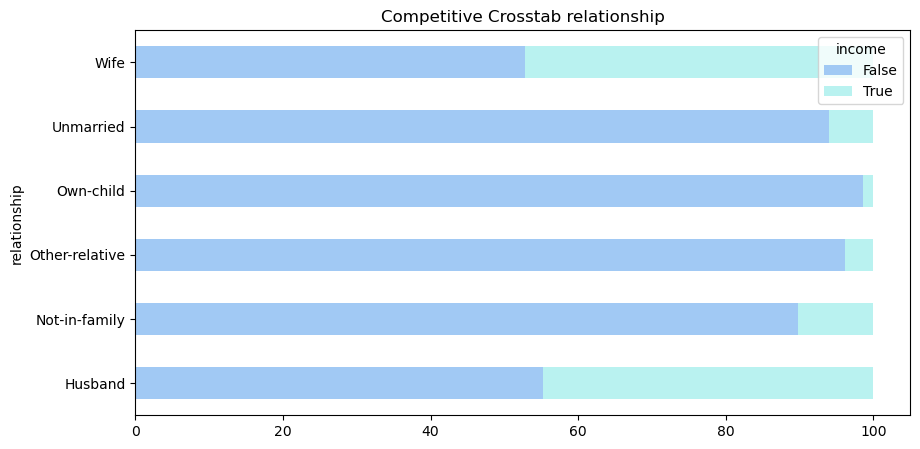

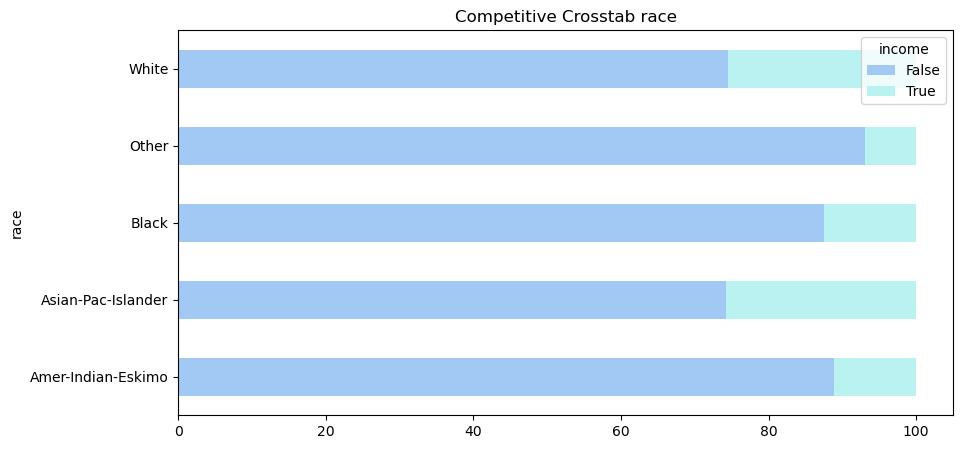

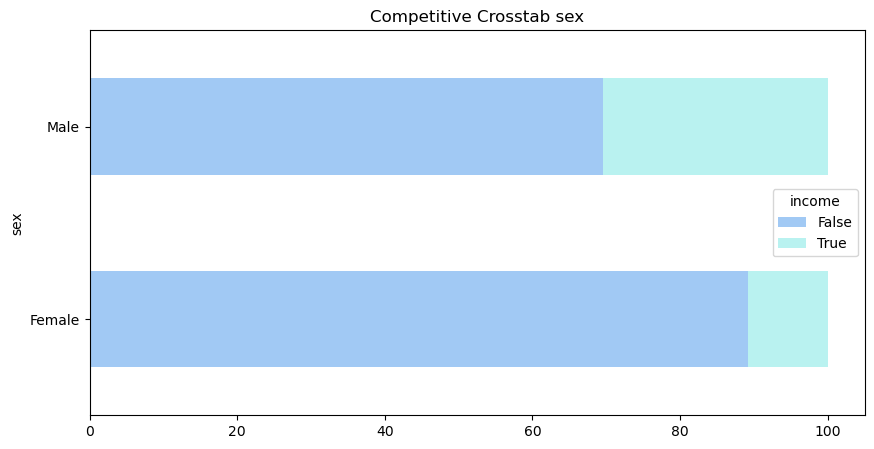

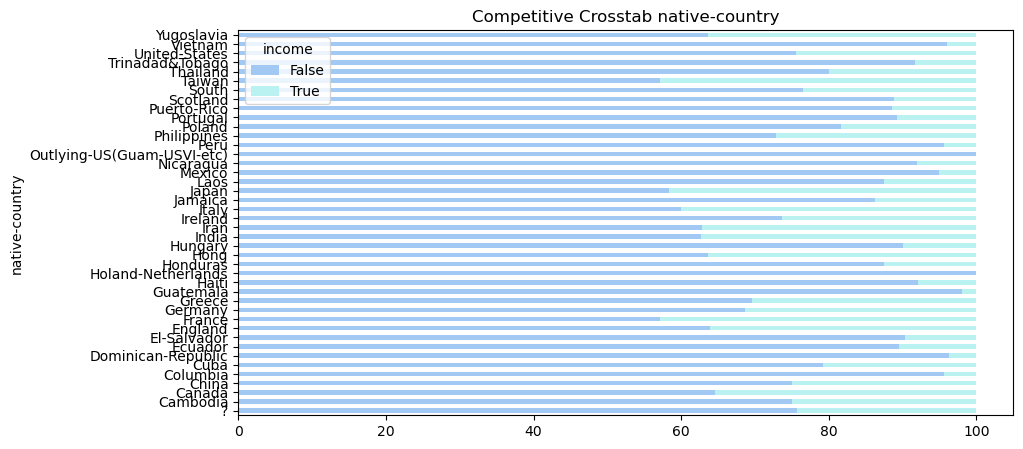

In [21]:
# Crosstab
plt.rcParams.update({'figure.max_open_warning': 0})
data = train_crosstab_df[['workclass', 'education', 'marital-status', 'occupation', 
          'relationship', 'race', 'sex', 'native-country','income']]
            
for column in data.columns:
    if column != 'income':
        results = pd.crosstab(data['income'], data[column])
        results = results.transpose()
        results_normalized = results.div(results.sum(axis = 1), axis = 0) * 100
        
        colours = sns.color_palette('pastel', n_colors=10)
        cmap1 = LinearSegmentedColormap.from_list("my_colormap", colours)
        
        ax = results_normalized.plot(kind = 'barh', stacked = True, figsize = (10,5), colormap = cmap1)
        ax.set_title('Competitive Crosstab ' + column)    

# 2. Pre-Processing the Data

In [22]:
# num_col_list = ['age',
#              'demogweight',
#              'education-num',
#              'capital-gain',
#              'capital-loss',
#              'hours-per-week']

In [23]:
# # obj_col_list.remove('income')
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(train_df[obj_col_list]).toarray())
# enc_df.columns = enc.get_feature_names_out(obj_col_list)
# joined_df = train_df.loc[:,~train_df.columns.isin(obj_col_list)].join(enc_df)

In [24]:
# obj_col_list.remove('income')
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(train_df[obj_col_list]).toarray())
enc_df.columns = enc.get_feature_names_out(obj_col_list)

In [25]:
# drop income_<50K. column
enc_df.drop(enc_df.columns[len(enc_df.columns)-2], axis=1, inplace=True)

In [26]:
enc_df.head(10)

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
# standardize the training dataset with StandardScaler
scaler = StandardScaler().fit(train_df.loc[:,~train_df.columns.isin(obj_col_list)])
scaled_train_df = scaler.transform(train_df.loc[:,~train_df.columns.isin(obj_col_list)])
joined_df = pd.DataFrame(scaled_train_df).join(enc_df)
joined_df.head(5)

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K.
0,0.028718,-1.065847,1.141407,0.144984,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.832371,-1.010810,1.141407,-0.145406,-0.215579,-2.228425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.044341,0.246021,-0.422936,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.051550,0.427182,-1.205107,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.774935,1.411943,1.141407,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
joined_array = joined_df.to_numpy()

In [29]:
# # standardize the training dataset with StandardScaler
# scaler = StandardScaler().fit(joined_df)
# scaled_train_df = scaler.transform(joined_df)
# pd.DataFrame(scaled_train_df).head(5)

In [30]:
pd.DataFrame(joined_array).describe()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
count,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-1.896572e-16,-9.537260e-17,-2.096989e-16,1.070988e-16,1.408302e-15,2.163247e-16,0.055960,0.030000,0.06496,0.000200,...,0.00384,0.000360,0.002560,0.001680,0.000600,0.000480,0.896840,0.002000,0.000440,0.239360
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.229849,0.170591,0.24646,0.014141,...,0.06185,0.018971,0.050533,0.040954,0.024488,0.021904,0.304174,0.044678,0.020972,0.426701
min,-1.578588e+00,-1.685368e+00,-3.551622e+00,-1.454062e-01,-2.155785e-01,-3.204112e+00,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.749351e-01,-6.817081e-01,-4.229358e-01,-1.454062e-01,-2.155785e-01,-3.312784e-02,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.174006e-01,-1.081637e-01,-3.185002e-02,-1.454062e-01,-2.155785e-01,-3.312784e-02,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.862527e-01,4.475067e-01,7.503215e-01,-1.454062e-01,-2.155785e-01,3.734086e-01,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.754747e+00,1.229871e+01,2.314664e+00,1.321189e+01,1.064062e+01,4.764002e+00,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Model Building

In [31]:
test_size = 0.15

## 3.1 Base Model

In [32]:
# Split the dataset to X and response
X = joined_array[:,:-1]
y = joined_array[:,-1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21250, 108), (3750, 108), (21250,), (3750,))

In [34]:
# Function that creates the model
def create_model(neurons=1, optimizer='rmsprop', batch_size=None, kernel_initializer = 'uniform', activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=108, kernel_initializer=kernel_initializer, 
                    activation=activation))
    model.add(Dense(1, kernel_initializer=kernel_initializer, 
                    activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy']) 
    return model

In [35]:
# hyperparameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]

In [36]:
# instantiate KerasClassifier
model = KerasClassifier(build_fn=create_model,
                        batch_size=10, verbose=1)

In [37]:
# Create a base model that only varies the number of neurons. Use cross-validation to find the optimal neuron #. 
neurons = neurons = [1, 10, 15, 25, 35, 45]
epochs = [10, 25, 50, 75, 100]

param_grid = dict(neurons=neurons, epochs=epochs)

# Grid search with 5-fold CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

In [38]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/100
2125/2125 [==============================] - 2s 605us/step - loss: 0.3453 - accuracy: 0.8412
Epoch 2/100
2125/2125 [==============================] - 1s 561us/step - loss: 0.3187 - accuracy: 0.8525
Epoch 3/100
2125/2125 [==============================] - 1s 558us/step - loss: 0.3164 - accuracy: 0.8533
Epoch 4/100
2125/2125 [==============================] - 1s 556us/step - loss: 0.3150 - accuracy: 0.8550
Epoch 5/100
2125/2125 [==============================] - 1s 552us/step - loss: 0.3131 - accuracy: 0.8578
Epoch 6/100
2125/2125 [==============================] - 1s 548us/step - loss: 0.3117 - accuracy: 0.8565
Epoch 7/100
2125/2125 [==============================] - 1s 560us/step - loss: 0.3108 - accuracy: 0.8575
Epoch 8/100
2125/2125 [==============================] - 1s 550us/step - loss: 0.3098 - accuracy: 0.8593
Epoch 9/100
2125/2125 [==============================] - 1s 569us/step - loss: 0.3095 - accuracy: 0.8586
Epoch 10/100
2125/2125 [==============================]

2125/2125 [==============================] - 1s 550us/step - loss: 0.3064 - accuracy: 0.8641
Epoch 79/100
2125/2125 [==============================] - 1s 554us/step - loss: 0.3074 - accuracy: 0.8646
Epoch 80/100
2125/2125 [==============================] - 1s 547us/step - loss: 0.3078 - accuracy: 0.8642
Epoch 81/100
2125/2125 [==============================] - 1s 550us/step - loss: 0.3072 - accuracy: 0.8651
Epoch 82/100
2125/2125 [==============================] - 1s 547us/step - loss: 0.3068 - accuracy: 0.8647
Epoch 83/100
2125/2125 [==============================] - 1s 553us/step - loss: 0.3072 - accuracy: 0.8646
Epoch 84/100
2125/2125 [==============================] - 1s 542us/step - loss: 0.3072 - accuracy: 0.8643
Epoch 85/100
2125/2125 [==============================] - 1s 551us/step - loss: 0.3072 - accuracy: 0.8642
Epoch 86/100
2125/2125 [==============================] - 1s 545us/step - loss: 0.3072 - accuracy: 0.8650
Epoch 87/100
2125/2125 [==============================] - 1

In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.cv_results_

Best: 0.858165 using {'epochs': 100, 'neurons': 25}


{'mean_fit_time': array([ 21.94835267,  21.84726582,  22.31616826,  22.30435829,
         26.26666164,  20.46117516,  49.92288098,  51.34810524,
         55.57263398,  56.75945287,  57.08983712,  55.65890751,
        107.64686227, 101.03328171, 103.61980338, 106.62788711,
        108.11256251, 111.86848845, 156.03812766, 166.4748919 ,
        161.01350121, 166.61301064, 170.62775927, 163.70621405,
        215.44685626, 215.90214739, 213.41861444, 195.60341187,
        183.32796841, 156.19476185]),
 'std_fit_time': array([ 0.54350372,  0.41369573,  0.57957901,  0.47822016,  7.86298838,
         0.65074519,  1.7398128 ,  0.46583065,  2.74565648,  1.20945622,
         2.13398335,  1.43249675,  5.57706461,  4.60005427,  7.97731301,
         5.55805006,  2.77739754,  2.3498514 ,  5.07714803,  6.05528282,
         5.25755399, 18.5600574 ,  9.5721762 ,  2.57135438,  4.88767484,
         3.82693065,  4.97858998,  4.48693304, 13.04918957,  2.08217867]),
 'mean_score_time': array([0.89326735, 0.

In [40]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

0.850541 (0.003698) with {'epochs': 10, 'neurons': 1}
0.853835 (0.004690) with {'epochs': 10, 'neurons': 10}
0.853412 (0.004760) with {'epochs': 10, 'neurons': 15}
0.854682 (0.006332) with {'epochs': 10, 'neurons': 25}
0.856188 (0.007810) with {'epochs': 10, 'neurons': 35}
0.856424 (0.005597) with {'epochs': 10, 'neurons': 45}
0.850259 (0.003671) with {'epochs': 25, 'neurons': 1}
0.853412 (0.006504) with {'epochs': 25, 'neurons': 10}
0.856235 (0.006092) with {'epochs': 25, 'neurons': 15}
0.856518 (0.006214) with {'epochs': 25, 'neurons': 25}
0.858118 (0.006670) with {'epochs': 25, 'neurons': 35}
0.857412 (0.007246) with {'epochs': 25, 'neurons': 45}
0.850400 (0.003899) with {'epochs': 50, 'neurons': 1}
0.855529 (0.006063) with {'epochs': 50, 'neurons': 10}
0.856141 (0.006624) with {'epochs': 50, 'neurons': 15}
0.857224 (0.006247) with {'epochs': 50, 'neurons': 25}
0.856329 (0.005954) with {'epochs': 50, 'neurons': 35}
0.857741 (0.005336) with {'epochs': 50, 'neurons': 45}
0.850965 (0.0

In [41]:
neurons=grid_result.best_params_['neurons']
optimizer='rmsprop'
batch_size=None
kernel_initializer = 'uniform'
activation='relu'

model_test = Sequential()
model_test.add(Dense(neurons, input_dim=108, kernel_initializer=kernel_initializer, 
                activation=activation))
model_test.add(Dense(1, kernel_initializer=kernel_initializer, 
                activation='sigmoid'))
model_test.compile(loss='binary_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy']) 

In [42]:
model_test.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=10, verbose=1)

Epoch 1/100
2125/2125 [==============================] - 1s 551us/step - loss: 0.3431 - accuracy: 0.8402
Epoch 2/100
2125/2125 [==============================] - 1s 548us/step - loss: 0.3187 - accuracy: 0.8527
Epoch 3/100
2125/2125 [==============================] - 1s 561us/step - loss: 0.3155 - accuracy: 0.8546
Epoch 4/100
2125/2125 [==============================] - 1s 567us/step - loss: 0.3144 - accuracy: 0.8561
Epoch 5/100
2125/2125 [==============================] - 1s 559us/step - loss: 0.3130 - accuracy: 0.8560
Epoch 6/100
2125/2125 [==============================] - 1s 551us/step - loss: 0.3123 - accuracy: 0.8570
Epoch 7/100
2125/2125 [==============================] - 1s 543us/step - loss: 0.3112 - accuracy: 0.8585
Epoch 8/100
2125/2125 [==============================] - 1s 548us/step - loss: 0.3102 - accuracy: 0.8581
Epoch 9/100
2125/2125 [==============================] - 1s 548us/step - loss: 0.3094 - accuracy: 0.8592
Epoch 10/100
2125/2125 [==============================]

2125/2125 [==============================] - 1s 551us/step - loss: 0.3081 - accuracy: 0.8642
Epoch 79/100
2125/2125 [==============================] - 1s 554us/step - loss: 0.3081 - accuracy: 0.8647
Epoch 80/100
2125/2125 [==============================] - 1s 559us/step - loss: 0.3085 - accuracy: 0.8667
Epoch 81/100
2125/2125 [==============================] - 1s 604us/step - loss: 0.3082 - accuracy: 0.8652
Epoch 82/100
2125/2125 [==============================] - 1s 597us/step - loss: 0.3088 - accuracy: 0.8652
Epoch 83/100
2125/2125 [==============================] - 1s 553us/step - loss: 0.3085 - accuracy: 0.8663
Epoch 84/100
2125/2125 [==============================] - 1s 556us/step - loss: 0.3079 - accuracy: 0.8662
Epoch 85/100
2125/2125 [==============================] - 1s 554us/step - loss: 0.3082 - accuracy: 0.8652
Epoch 86/100
2125/2125 [==============================] - 1s 554us/step - loss: 0.3080 - accuracy: 0.8649
Epoch 87/100
2125/2125 [==============================] - 1

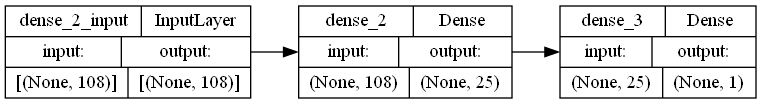

In [43]:
keras.utils.plot_model(model_test, show_shapes=True, rankdir="LR")

In [44]:
y_pred = (model_test.predict(X_test) > 0.5).astype(int)

118/118 [==============================] - 0s 513us/step


In [45]:
# Confusion Matrix
# TT  FN
# FT  TN
confusion_matrix(y_test, y_pred)

array([[2662,  189],
       [ 352,  547]], dtype=int64)

In [46]:
balanced_accuracy_score(y_test, y_pred)

0.7710806543300577

In [47]:
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(batch_size=batch_size, epochs=epochs, model__neurons=neurons, model__activation=activation)

## 3.2 Model without Country

In [75]:
obj_col_wo_country_list = ['workclass',
                         'education',
                         'marital-status',
                         'occupation',
                         'relationship',
                         'race',
                         'sex',
                         'income']

In [76]:
num_col_list = ['age',
              'demogweight',
              'education-num',
              'capital-gain',
              'capital-loss',
              'hours-per-week']

In [77]:

enc_wo_country = OneHotEncoder(handle_unknown='ignore')
enc_wo_country = pd.DataFrame(enc.fit_transform(train_df[obj_col_wo_country_list]).toarray())
enc_wo_country.columns = enc.get_feature_names_out(obj_col_wo_country_list)

In [78]:
# drop income_<50K. column
enc_wo_country.drop(enc_wo_country.columns[len(enc_wo_country.columns)-2], axis=1, inplace=True)

In [79]:
# standardize the training dataset with StandardScaler
scaler_wo_country = StandardScaler().fit(train_df.loc[:,num_col_list])
scaled_train_wo_country_df = scaler_wo_country.transform(train_df.loc[:,num_col_list])
joined_wo_country_df = pd.DataFrame(scaled_train_wo_country_df).join(enc_wo_country)
joined_wo_country_df.head(5)

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_>50K.
0,0.028718,-1.065847,1.141407,0.144984,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.832371,-1.010810,1.141407,-0.145406,-0.215579,-2.228425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.044341,0.246021,-0.422936,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.051550,0.427182,-1.205107,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.774935,1.411943,1.141407,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [80]:
joined_wo_country_array = joined_wo_country_df.to_numpy()

In [81]:
# Split the dataset to X and response
X_wo_country = joined_wo_country_array[:,:-1]
y_wo_country = joined_wo_country_array[:,-1]

In [82]:
X_train_wo_country, X_test_wo_country, y_train_wo_country, y_test_wo_country = train_test_split(X_wo_country, y_wo_country, test_size = test_size)
X_train_wo_country.shape, X_test_wo_country.shape, y_train_wo_country.shape, y_test_wo_country.shape

((21250, 66), (3750, 66), (21250,), (3750,))

In [83]:
# Function that creates the model
def create_model_wo_country(neurons=1, optimizer='rmsprop', batch_size=None, kernel_initializer = 'uniform', activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=66, kernel_initializer=kernel_initializer, 
                    activation=activation))
    model.add(Dense(1, kernel_initializer=kernel_initializer, 
                    activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy']) 
    return model

In [84]:
# instantiate KerasClassifier
model_wo_country = KerasClassifier(build_fn=create_model_wo_country, 
                        batch_size=10, verbose=1)

In [85]:
# Create a base model that only varies the number of neurons. Use cross-validation to find the optimal neuron #. 
neurons = neurons = [10, 25, 35, 45, 55, 65]
epochs = [10, 25, 50, 75, 100]

param_grid_wo_country = dict(neurons=neurons, epochs=epochs)

# Grid search with 5-fold CV
grid_wo_country = GridSearchCV(estimator=model_wo_country, param_grid=param_grid_wo_country, n_jobs=-1, cv=5)

In [86]:
grid_result_wo_country = grid_wo_country.fit(X_train_wo_country, y_train_wo_country)

Epoch 1/50
2125/2125 [==============================] - 1s 576us/step - loss: 0.3386 - accuracy: 0.8426
Epoch 2/50
2125/2125 [==============================] - 1s 555us/step - loss: 0.3190 - accuracy: 0.8527
Epoch 3/50
2125/2125 [==============================] - 1s 555us/step - loss: 0.3163 - accuracy: 0.8552
Epoch 4/50
2125/2125 [==============================] - 1s 564us/step - loss: 0.3152 - accuracy: 0.8559
Epoch 5/50
2125/2125 [==============================] - 1s 579us/step - loss: 0.3141 - accuracy: 0.8561
Epoch 6/50
2125/2125 [==============================] - 1s 566us/step - loss: 0.3133 - accuracy: 0.8568
Epoch 7/50
2125/2125 [==============================] - 1s 565us/step - loss: 0.3129 - accuracy: 0.8578
Epoch 8/50
2125/2125 [==============================] - 1s 552us/step - loss: 0.3124 - accuracy: 0.8564
Epoch 9/50
2125/2125 [==============================] - 1s 547us/step - loss: 0.3121 - accuracy: 0.8582
Epoch 10/50
2125/2125 [==============================] - 1s 559u

In [87]:
print("Best: %f using %s" % (grid_result_wo_country.best_score_, grid_result_wo_country.best_params_))
grid_result_wo_country.cv_results_

Best: 0.858212 using {'epochs': 50, 'neurons': 45}


{'mean_fit_time': array([ 23.13056798,  23.28399973,  23.24746847,  22.27473292,
         23.23505745,  23.08422775,  58.24933281,  58.01102819,
         59.60119395,  57.0562078 ,  55.06739945,  54.38851666,
        107.60892987, 108.4759747 , 106.74999175, 109.7985105 ,
        108.88662758, 111.07370572, 168.03062835, 159.75482001,
        162.76170259, 172.70154057, 164.00857363, 172.96276479,
        217.14161186, 223.03877726, 209.92861662, 200.91347327,
        182.12283278, 160.46743307]),
 'std_fit_time': array([ 0.37498635,  0.39580733,  0.40087047,  0.23502455,  1.27920893,
         0.38838889,  3.18819484,  2.59272391,  3.2417567 ,  1.17218714,
         0.60949028,  0.73126174,  3.86530325,  3.65783495,  1.32296391,
         6.59386681,  4.75265207,  5.97848861,  2.58677037,  6.97034083,
         5.24961198,  8.07595377,  3.15389209, 16.78712208, 10.71842322,
        20.21917596,  1.27034363,  4.57063627,  9.92854962,  5.73042361]),
 'mean_score_time': array([0.76345563, 0.

In [88]:
means = grid_result_wo_country.cv_results_['mean_test_score']
stds = grid_result_wo_country.cv_results_['std_test_score']
params = grid_result_wo_country.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

0.852894 (0.004733) with {'epochs': 10, 'neurons': 10}
0.855529 (0.004445) with {'epochs': 10, 'neurons': 25}
0.854306 (0.005880) with {'epochs': 10, 'neurons': 35}
0.855859 (0.005875) with {'epochs': 10, 'neurons': 45}
0.855812 (0.005689) with {'epochs': 10, 'neurons': 55}
0.855624 (0.005830) with {'epochs': 10, 'neurons': 65}
0.854118 (0.005125) with {'epochs': 25, 'neurons': 10}
0.855341 (0.006614) with {'epochs': 25, 'neurons': 25}
0.856612 (0.005931) with {'epochs': 25, 'neurons': 35}
0.857271 (0.005424) with {'epochs': 25, 'neurons': 45}
0.856565 (0.005693) with {'epochs': 25, 'neurons': 55}
0.857506 (0.006790) with {'epochs': 25, 'neurons': 65}
0.855059 (0.005990) with {'epochs': 50, 'neurons': 10}
0.856424 (0.007840) with {'epochs': 50, 'neurons': 25}
0.856612 (0.005210) with {'epochs': 50, 'neurons': 35}
0.858212 (0.005905) with {'epochs': 50, 'neurons': 45}
0.855388 (0.005569) with {'epochs': 50, 'neurons': 55}
0.856424 (0.006783) with {'epochs': 50, 'neurons': 65}
0.855624 (

In [108]:
neurons=grid_result_wo_country.best_params_['neurons']
optimizer='rmsprop'
batch_size=None
kernel_initializer = 'uniform'
activation='relu'

model_test_wo_country = Sequential()
model_test_wo_country.add(Dense(neurons, input_dim=66, kernel_initializer=kernel_initializer, 
                activation=activation))
model_test_wo_country.add(Dense(1, kernel_initializer=kernel_initializer, 
                activation='sigmoid'))
model_test_wo_country.compile(loss='binary_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy']) 

In [109]:
model_test_wo_country.fit(X_train_wo_country, y_train_wo_country, epochs=grid_result_wo_country.best_params_['epochs'], batch_size=10, verbose=1)

Epoch 1/50
2125/2125 [==============================] - 1s 527us/step - loss: 0.3397 - accuracy: 0.8422
Epoch 2/50
2125/2125 [==============================] - 1s 527us/step - loss: 0.3193 - accuracy: 0.8524
Epoch 3/50
2125/2125 [==============================] - 1s 554us/step - loss: 0.3176 - accuracy: 0.8563
Epoch 4/50
2125/2125 [==============================] - 1s 541us/step - loss: 0.3166 - accuracy: 0.8563
Epoch 5/50
2125/2125 [==============================] - 1s 550us/step - loss: 0.3153 - accuracy: 0.8564
Epoch 6/50
2125/2125 [==============================] - 1s 544us/step - loss: 0.3145 - accuracy: 0.8573
Epoch 7/50
2125/2125 [==============================] - 1s 548us/step - loss: 0.3140 - accuracy: 0.8573
Epoch 8/50
2125/2125 [==============================] - 1s 530us/step - loss: 0.3134 - accuracy: 0.8581
Epoch 9/50
2125/2125 [==============================] - 1s 524us/step - loss: 0.3128 - accuracy: 0.8575
Epoch 10/50
2125/2125 [==============================] - 1s 518u

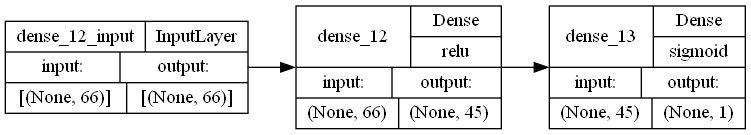

In [110]:
keras.utils.plot_model(model_test_wo_country, show_shapes=True, rankdir="LR", show_layer_activations=True)

In [111]:
y_pred = (model_test_wo_country.predict(X_test_wo_country) > 0.5).astype(int)

118/118 [==============================] - 0s 492us/step


In [112]:
# Confusion Matrix
# TT  FN
# FT  TN
confusion_matrix(y_test_wo_country, y_pred)

array([[2718,  151],
       [ 377,  504]], dtype=int64)

In [113]:
balanced_accuracy_score(y_test_wo_country, y_pred)

0.7597228030348289

## 3.3 Sensitivity Analysis

In [107]:
x_stats_df = joined_wo_country_df.describe().loc[["mean", 'min', 'max']]
x_stats_df

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_>50K.
mean,-1.896572e-16,-9.537260e-17,-2.096989e-16,1.070988e-16,1.408302e-15,2.163247e-16,0.05596,0.03,0.06496,0.0002,...,0.1056,0.04852,0.00964,0.031,0.09516,0.00856,0.85564,0.33164,0.66836,0.23936
min,-1.578588e+00,-1.685368e+00,-3.551622e+00,-1.454062e-01,-2.155785e-01,-3.204112e+00,0.00000,0.00,0.00000,0.0000,...,0.0000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,3.754747e+00,1.229871e+01,2.314664e+00,1.321189e+01,1.064062e+01,4.764002e+00,1.00000,1.00,1.00000,1.0000,...,1.0000,1.00000,1.00000,1.000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [157]:
x_means = x_stats_df.loc[['mean']].to_numpy()[:,:-1]

In [163]:
y_mean_pred = model_test_wo_country.predict(x_means)
y_mean_pred[0,0]

1/1 [==============================] - 0s 12ms/step


0.062631175

In [184]:
sensitivity_dict = dict()

for idx, col in enumerate(x_stats_df.iloc[:,:-1].columns):
    x_row = np.copy(x_means)
    x_min = x_stats_df.loc['min', col]
    x_max = x_stats_df.loc['max', col]
    
    sensitivity_dict[col] = dict()
    sensitivity_dict[col]["x_min"] = x_min
    sensitivity_dict[col]["x_max"] = x_max
    
    x_row[0, idx] = x_min
    y_sens_pred_min = model_test_wo_country.predict(x_row)[0,0]
    sensitivity_dict[col]["y_min"] = y_sens_pred_min
    
    x_row[0, idx] = x_max
    y_sens_pred_max = model_test_wo_country.predict(x_row)[0,0]
    sensitivity_dict[col]["y_max"] = y_sens_pred_max
    
    y_sens_diff = y_sens_pred_max - y_sens_pred_min
    sensitivity_dict[col]["diff"] = y_sens_diff
    
    

1/1 [==============================] - 0s 12ms/step


In [198]:
sensitivity_df = pd.DataFrame(sensitivity_dict)
sensitivity_df = sensitivity_df.rename(columns={0:'age', 1:'demogweight', 2:'education-num', 3:'capital-gain', 
                               4:'capital-loss', 5:'hours-per-week'})
sensitivity_df

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
x_min,-1.578588,-1.685368,-3.551622,-0.145406,-0.215579,-3.204112,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_max,3.754747,12.298706,2.314664,13.211888,10.640617,4.764002,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
y_min,0.014363,0.085753,0.825014,0.070225,0.067022,0.000939,0.068556,0.063318,0.067758,0.062631,...,0.093899,0.076976,0.062000,0.063137,0.063378,0.064809,0.063129,0.035220,0.062487,0.032414
y_max,0.029639,0.495490,0.243116,1.000000,0.998665,0.109456,0.012899,0.044095,0.019505,0.061956,...,0.006229,0.010120,0.076277,0.026901,0.043064,0.045105,0.024497,0.068892,0.062923,0.086020
diff,0.015276,0.409737,-0.581898,0.929775,0.931643,0.108517,-0.055657,-0.019223,-0.048253,-0.000676,...,-0.087670,-0.066856,0.014277,-0.036237,-0.020313,-0.019703,-0.038632,0.033673,0.000436,0.053606


Text(0, 0.5, 'Difference in Predicated Probability')

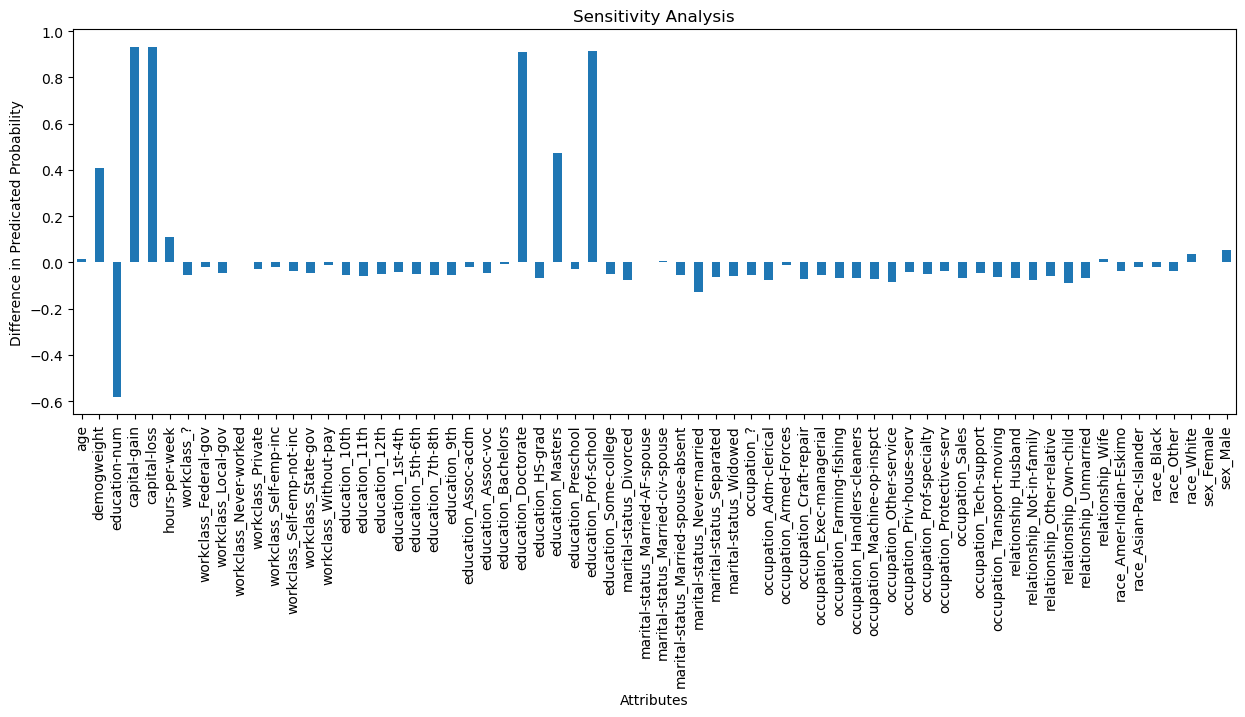

In [197]:
# Sensitivity Bar Chart
ax = sensitivity_df.loc["diff"].plot(kind="bar", figsize=(15, 5), title='Sensitivity Analysis')
ax.set_xlabel("Attributes")
ax.set_ylabel("Difference in Predicated Probability")

## 3.4 Decision Tree

In [208]:
tree_wo_country_df = joined_wo_country_df.rename(columns={0:'age', 1:'demogweight', 2:'education-num', 3:'capital-gain', 
                               4:'capital-loss', 5:'hours-per-week'})
tree_wo_country_df.head(3)

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_>50K.
0,0.028718,-1.065847,1.141407,0.144984,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.832371,-1.010810,1.141407,-0.145406,-0.215579,-2.228425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.044341,0.246021,-0.422936,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [205]:
X = tree_wo_country_df.iloc[:,:-1]
y = tree_wo_country_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [274]:
fullClassTree = DecisionTreeClassifier(random_state = seed, min_samples_leaf = 400, max_leaf_nodes = 12)
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=12, min_samples_leaf=400, random_state=84)

In [275]:
y_predicted = fullClassTree.predict(X_test)

In [276]:
accuracy_score(y_test, y_predicted)

0.8418666666666667

In [277]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.8394)

       Prediction
Actual     0     1
     0 14938  1256
     1  2157  2899


In [278]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8419)

       Prediction
Actual    0    1
     0 2641  181
     1  412  516


In [279]:
fullClassTree.tree_.max_depth

7

In [280]:
fullClassTree.tree_.node_count

23

In [281]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 400,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 84,
 'splitter': 'best'}

In [283]:
first_tree_dot = export_graphviz(fullClassTree,  
                feature_names=X_train.columns, filled=True)

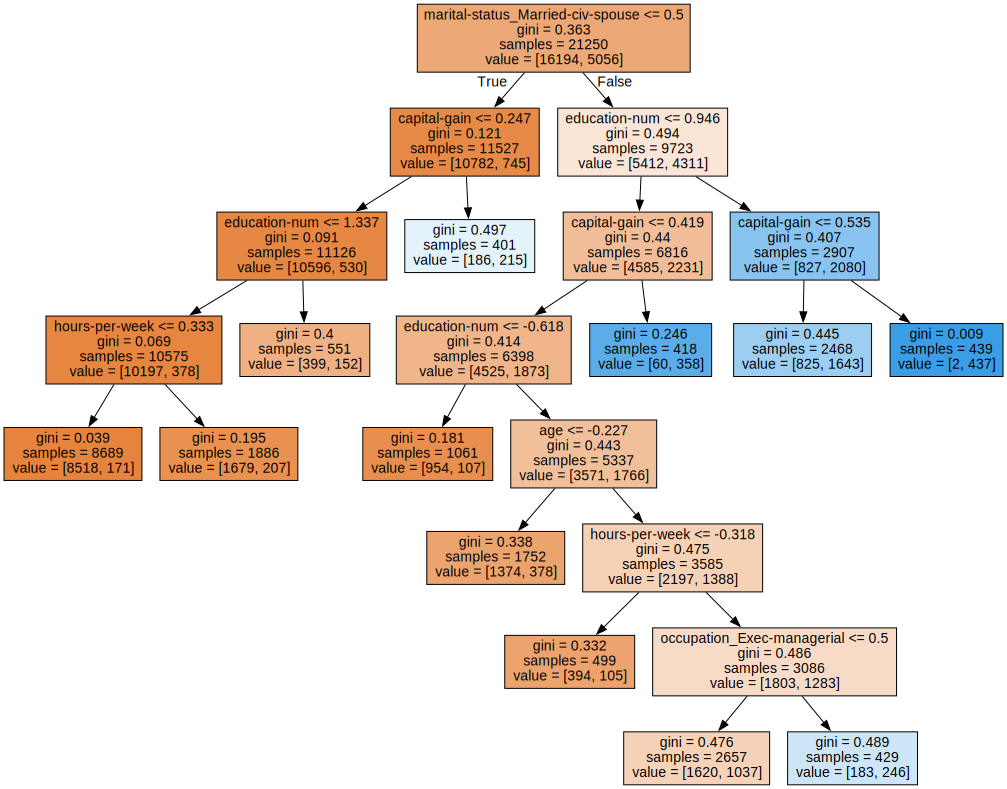

In [285]:
display(graphviz.Source(first_tree_dot))

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)
pd.DataFrame(scaled_dataset).head()

In [ ]:
X = scaled_dataset[:,:109]
y = scaled_dataset[:,109]

In [ ]:
pd.DataFrame(X).head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Find best predictors

In [ ]:
acc = []
for i in range(0,len(train.columns)):
  if train.columns[i] != 'income':
    print('Column Name: ', train.columns[i])

    cols = [col for col in train.columns if col not in train.columns[i]]
    subset = train[cols]
    
    df = pd.get_dummies(train, columns = cols)
    scaled_df = scaler.fit_transform(df)

    n_cols = scaled_df.shape[1] - 1
    X = scaled_df[:,:n_cols]
    y = scaled_df[:,n_cols]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # What model do we want to use?

    model = Sequential()
    model.add(Dense(n_cols, input_dim = n_cols, kernel_initializer='uniform'))
    model.add(layers.Activation('relu'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    fit = model.fit(X_train, y_train, epochs = 20, shuffle = True, batch_size = 48)
    score, accuracy = model.evaluate(X_test, y_test)

    acc.append([train.columns[i], 100*np.max(fit.history['val_accuracy'])])


In [ ]:
train.head()